In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Histogram

In [5]:
url_data = (r'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips = pd.read_csv(url_data)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


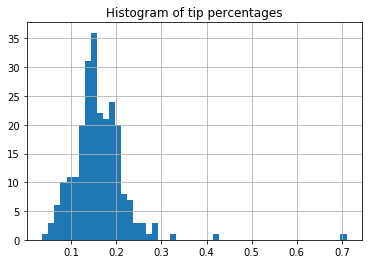

In [6]:
plt.figure();
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)
plt.title("Histogram of tip percentages");

# Density Plot

In [ ]:
Perhaps instead of a histogram of bins, you want to show a smooth distribution of density. 
To do so, we can simply choose the 'kde' style of plot.

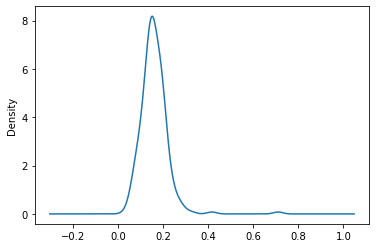

In [7]:
tips['tip_pct'].plot(kind='kde');

You can actually plot histograms and density plots together. Consider the following random data samples.

In [9]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)

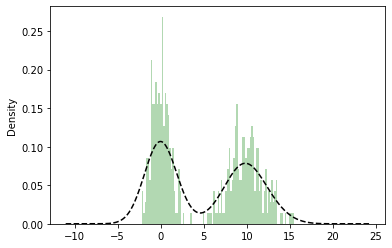

In [15]:
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='g',density='True')
values.plot(kind='kde', style='k--');

# Scatter plots


In [16]:
macro = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/macrodata/macrodata.csv')
macro.set_index(['year','quarter']).tail()

realgdp  realcons   realinv  realgovt  realdpi      cpi  \
year quarter                                                              
2008 3        13324.600    9267.7  1990.693   991.551   9838.3  216.889   
     4        13141.920    9195.3  1857.661  1007.273   9920.4  212.174   
2009 1        12925.410    9209.2  1558.494   996.287   9926.4  212.671   
     2        12901.504    9189.0  1456.678  1023.528  10077.5  214.469   
     3        12990.341    9256.0  1486.398  1044.088  10040.6  216.385   

                  m1  tbilrate  unemp      pop  infl  realint  
year quarter                                                   
2008 3        1474.7      1.17    6.0  305.270 -3.16     4.33  
     4        1576.5      0.12    6.9  305.952 -8.79     8.91  
2009 1        1592.8      0.22    8.1  306.547  0.94    -0.71  
     2        1653.6      0.18    9.2  307.226  3.37    -3.19  
     3        1673.9      0.12    9.6  308.013  3.56    -3.44

In [17]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


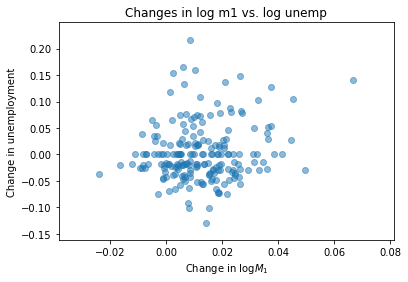

In [20]:
plt.scatter(trans_data['m1'], trans_data['unemp'], alpha=0.5);
plt.xlabel("Change in $\log M_1$")
plt.ylabel("Change in unemployment")
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'));
#It looks like increases in the money supply may have a positive effect on the unemployment rate. 
#Although, it is difficult to say exactly how (we might need a model to infer anything more).
#Certainly, unemployment seems to be decreasing when the money supply shrinks, according to the data.

We can also use seaborn’s regplot method, which makes a scatter plot and fits a linear
regression line as shown below:

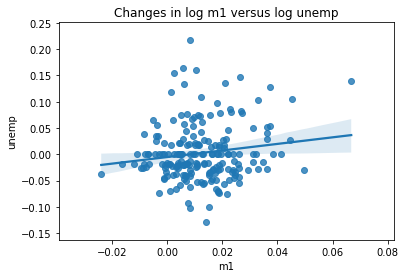

In [24]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'));

# Pairs Plot or Scatter Plot Matrix

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a
plot from scratch is a bit of work, so seaborn has a convenient pairplot function,
which supports placing histograms or density estimates of each variable along the
diagonal.

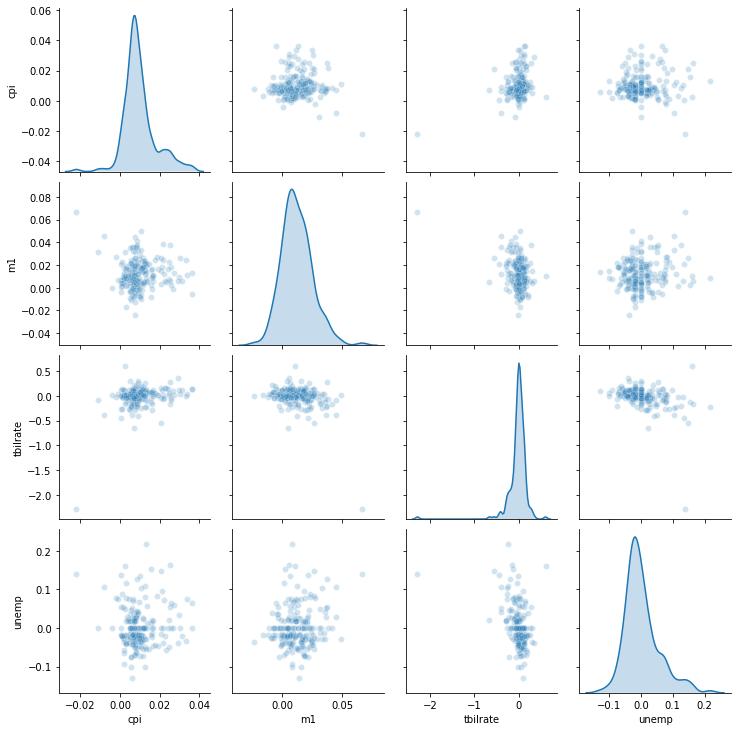

In [26]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2});

You may notice the plot_kws argument. This enables us to pass down configuration
options to the individual plotting calls on the off-diagonal elements. 
Check out the seaborn.pairplot docstring for more granular configuration options.

Each scatter plot in the matrix visualizes the relationship between a pair of variables, 
allowing many relationships to be explored in one chart.
A scatter plot matrix is composed of a grid of mini-plots and 
one larger preview plot that shows a selected mini-plot in more detail.